# Gaussian on a Grid Test with compositional score matching

In this notebook, we will test the compositional score matching on a hierarchical problem defined on a grid.
- The observations are on grid with `n_grid` x `n_grid` points.
- The global parameters are the same for all grid points with hyper-priors:
$$ \mu \sim \mathcal{N}(0, 3^2),\qquad \log\sigma \sim \mathcal{N}(0, 1^2)$$

- The local parameters are different for each grid point
$$ \theta_{i,j} \sim \mathcal{N}(\mu, \sigma^2)$$

-  In each grid point, we have a Brownian motion with drift:
$$ dx_t = \theta \cdot dt + \sqrt{dt} \cdot dW_t$$
- We observe $T=10$ time points for each grid point over a time horizon of `max_time=1`.

In [1]:
import os

import numpy as np

os.environ['KERAS_BACKEND'] = 'torch'
from bayesflow import diagnostics

from problems.gaussian_grid import Prior, Simulator, visualize_simulation_output, plot_shrinkage, get_stan_posterior

with torch.enable_grad():
in contexts where you need gradients (e.g. custom training loops).
/home/jonas/PyCharmProjects/hierarchical-abi/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:cmdstanpy:found newer exe file, not recompiling


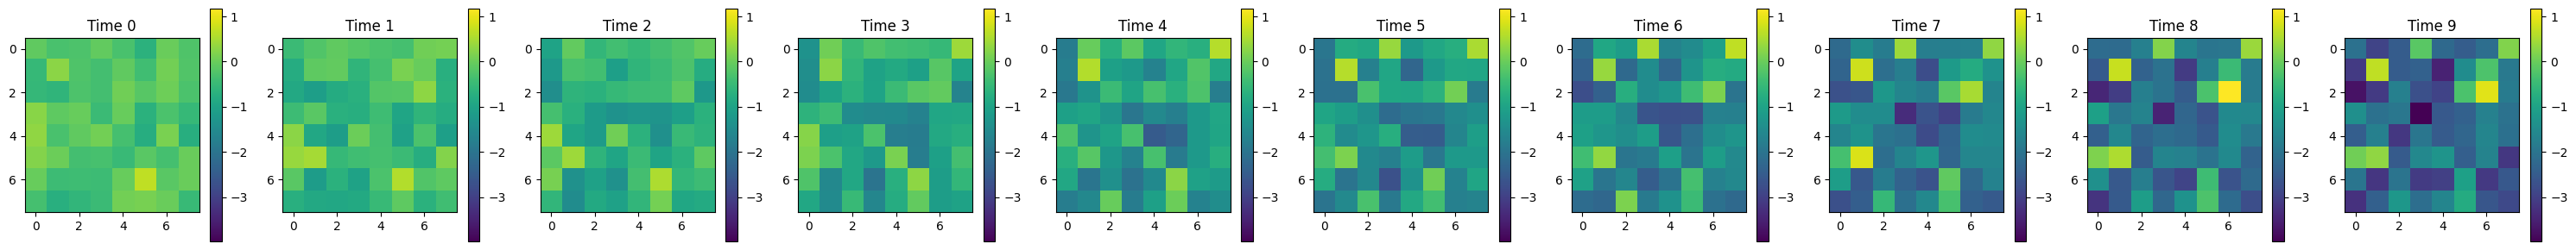

(0.1, 1)

In [2]:
n_grid = 8
T = 10
N = n_grid * n_grid  # number of samples
data_samples = 100

prior = Prior(n_time_points=T)
simulator = Simulator(n_time_points=T, max_time=1, sigma_noise=1)

global_param_names = [r'$\mu$', r'$\log \sigma$']
local_param_names = [r'$\theta_{' + str(i) + '}$' for i in range(n_grid * n_grid)]

# test the simulator
sim_test = simulator(prior.sample_full(1, n_grid=n_grid))['observable']
if T <= 10:
    visualize_simulation_output(sim_test)

simulator.dt, simulator.sigma_noise

In [3]:
np.random.seed(42)

global_posteriors = []
local_posteriors = []

true_global = []
true_local = []

for i in range(data_samples):
    print(i)
    param_sample = prior.sample_full(1, n_grid=n_grid)
    true_global.append([param_sample['mu'][0, 0], param_sample['log_sigma'][0, 0]])
    true_local.append(param_sample['theta'].flatten())
    sim_test = simulator(param_sample)['increments'][0]

    global_posterior, local_posterior = get_stan_posterior(sim_test, dt_obs=simulator.dt, sigma_noise=simulator.sigma_noise)
    global_posteriors.append(global_posterior)
    local_posteriors.append(local_posterior)

# make numpy arrays
global_posterior = np.stack(global_posteriors, axis=0)
local_posterior = np.stack(local_posteriors, axis=0).transpose(0, 2, 1)

true_global = np.stack(true_global, axis=0)
true_local = np.stack(true_local, axis=0)

DEBUG:cmdstanpy:cmd: /home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2pg5kzug/ir2os6ge.json
10:44:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=66727', 'data', 'file=/tmp/tmp2pg5kzug/ir2os6ge.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_1mw8j27/gaussian_grid-20250328104447_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
10:44:47 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: 

0


10:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:48 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:48 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:48 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=66727', 'data', 'file=/tmp/tmp2pg5kzug/ir2os6ge.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_1mw8j27/gaussian_grid-20250328104447_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_1mw8j27/gaussian_grid-20250328104447_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_1m

1


10:44:48 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:48 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:48 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=38746', 'data', 'file=/tmp/tmp2pg5kzug/0b6_ascw.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid4bxrof1b/gaussian_grid-20250328104448_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid4bxrof1b/gaussian_grid-20250328104448_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid4bx

2


10:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:49 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:49 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:49 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=70888', 'data', 'file=/tmp/tmp2pg5kzug/hl3svuor.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridajlb3w_k/gaussian_grid-20250328104448_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridajlb3w_k/gaussian_grid-20250328104448_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridajl

3


10:44:49 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:49 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:49 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=76549', 'data', 'file=/tmp/tmp2pg5kzug/c681_m5b.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridy7w2myfk/gaussian_grid-20250328104449_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridy7w2myfk/gaussian_grid-20250328104449_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridy7w

4


10:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:50 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:50 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:50 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=85776', 'data', 'file=/tmp/tmp2pg5kzug/h7pgrtl4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridv9qwo0r2/gaussian_grid-20250328104450_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridv9qwo0r2/gaussian_grid-20250328104450_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridv9q

5


10:44:51 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:51 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:51 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=89393', 'data', 'file=/tmp/tmp2pg5kzug/h6ygeewg.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridj_64hhae/gaussian_grid-20250328104450_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridj_64hhae/gaussian_grid-20250328104450_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridj_6

6


10:44:51 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:51 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:51 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=74928', 'data', 'file=/tmp/tmp2pg5kzug/53ncwzf5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridwzf_9jey/gaussian_grid-20250328104451_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridwzf_9jey/gaussian_grid-20250328104451_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridwzf

7


10:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:51 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:52 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:52 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=36882', 'data', 'file=/tmp/tmp2pg5kzug/74cra9l_.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid810hiaf5/gaussian_grid-20250328104451_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid810hiaf5/gaussian_grid-20250328104451_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid810

8


10:44:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:52 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:52 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:52 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10639', 'data', 'file=/tmp/tmp2pg5kzug/mr7enrzs.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridp8mehdud/gaussian_grid-20250328104452_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridp8mehdud/gaussian_grid-20250328104452_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridp8m

9


10:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:53 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:53 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:53 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=6285', 'data', 'file=/tmp/tmp2pg5kzug/s6sxjnh_.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridxcmcs1cl/gaussian_grid-20250328104452_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridxcmcs1cl/gaussian_grid-20250328104452_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridxcmc

10


10:44:53 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:53 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:53 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=53820', 'data', 'file=/tmp/tmp2pg5kzug/61cy08hz.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridt4ifj1h0/gaussian_grid-20250328104453_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridt4ifj1h0/gaussian_grid-20250328104453_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridt4i

11


10:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:54 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:54 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:54 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=95006', 'data', 'file=/tmp/tmp2pg5kzug/3oaoe6gg.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridryx925is/gaussian_grid-20250328104453_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridryx925is/gaussian_grid-20250328104453_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridryx

12


10:44:54 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:54 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:54 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=21594', 'data', 'file=/tmp/tmp2pg5kzug/g0dx37g4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridiyinzk4g/gaussian_grid-20250328104454_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridiyinzk4g/gaussian_grid-20250328104454_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridiyi

13


10:44:55 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:55 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:55 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=11797', 'data', 'file=/tmp/tmp2pg5kzug/yuum9lit.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridhtdkf50g/gaussian_grid-20250328104454_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridhtdkf50g/gaussian_grid-20250328104454_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridhtd

14


10:44:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:55 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:55 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:55 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=61867', 'data', 'file=/tmp/tmp2pg5kzug/fnw3uke3.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid0dxhegg4/gaussian_grid-20250328104455_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid0dxhegg4/gaussian_grid-20250328104455_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid0dx

15


10:44:56 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:56 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:56 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=65340', 'data', 'file=/tmp/tmp2pg5kzug/6jdehubd.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridcd56yzp9/gaussian_grid-20250328104455_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridcd56yzp9/gaussian_grid-20250328104455_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridcd5

16


10:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:56 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:56 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:56 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=30311', 'data', 'file=/tmp/tmp2pg5kzug/b2h26ej4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridet9wrht7/gaussian_grid-20250328104456_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridet9wrht7/gaussian_grid-20250328104456_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridet9

17


10:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:57 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:57 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:57 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=14973', 'data', 'file=/tmp/tmp2pg5kzug/8frpz205.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridm670u2cw/gaussian_grid-20250328104456_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridm670u2cw/gaussian_grid-20250328104456_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridm67

18


10:44:57 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:57 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:57 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=53422', 'data', 'file=/tmp/tmp2pg5kzug/frmt6mq5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid48hwc5ph/gaussian_grid-20250328104457_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid48hwc5ph/gaussian_grid-20250328104457_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid48h

19


10:44:58 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:58 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:58 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79794', 'data', 'file=/tmp/tmp2pg5kzug/d8hkzzfl.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridcxqdcbja/gaussian_grid-20250328104457_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridcxqdcbja/gaussian_grid-20250328104457_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridcxq

20


10:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:58 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:58 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:58 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=70114', 'data', 'file=/tmp/tmp2pg5kzug/4kl3j1xb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid1p4xf06h/gaussian_grid-20250328104458_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid1p4xf06h/gaussian_grid-20250328104458_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid1p4

21


10:44:59 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:59 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:44:59 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=77359', 'data', 'file=/tmp/tmp2pg5kzug/npk2i8oq.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid9m2qh3dm/gaussian_grid-20250328104458_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid9m2qh3dm/gaussian_grid-20250328104458_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid9m2

22


10:44:59 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:44:59 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:44:59 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=16643', 'data', 'file=/tmp/tmp2pg5kzug/al3oj4yg.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridyslmo26u/gaussian_grid-20250328104459_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridyslmo26u/gaussian_grid-20250328104459_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridysl

23


10:45:00 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:00 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:00 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=34476', 'data', 'file=/tmp/tmp2pg5kzug/8px8g0ab.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridtsk6q7qb/gaussian_grid-20250328104459_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridtsk6q7qb/gaussian_grid-20250328104459_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridtsk

24


10:45:00 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:00 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:00 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=78159', 'data', 'file=/tmp/tmp2pg5kzug/v6x63hdb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridcnnibisy/gaussian_grid-20250328104500_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridcnnibisy/gaussian_grid-20250328104500_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridcnn

25


10:45:01 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:01 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:01 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=19085', 'data', 'file=/tmp/tmp2pg5kzug/yeji7en2.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid9bywumma/gaussian_grid-20250328104500_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid9bywumma/gaussian_grid-20250328104500_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid9by

26


10:45:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:02 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:02 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:02 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=25662', 'data', 'file=/tmp/tmp2pg5kzug/tye9kdng.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridlheeyf5t/gaussian_grid-20250328104501_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridlheeyf5t/gaussian_grid-20250328104501_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridlhe

27


10:45:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:02 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:02 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:02 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=7554', 'data', 'file=/tmp/tmp2pg5kzug/ndqv7heu.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grids8j07_ym/gaussian_grid-20250328104502_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grids8j07_ym/gaussian_grid-20250328104502_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grids8j0

28


10:45:03 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:03 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:03 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=54173', 'data', 'file=/tmp/tmp2pg5kzug/r4qs330i.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridzhzx_9g7/gaussian_grid-20250328104502_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridzhzx_9g7/gaussian_grid-20250328104502_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridzhz

29


10:45:03 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:03 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:03 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=61997', 'data', 'file=/tmp/tmp2pg5kzug/_88brv3j.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid4_esakwz/gaussian_grid-20250328104503_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid4_esakwz/gaussian_grid-20250328104503_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid4_e

30


10:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:04 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:04 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=1619', 'data', 'file=/tmp/tmp2pg5kzug/o6w04yus.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid6vk9ov7f/gaussian_grid-20250328104503_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid6vk9ov7f/gaussian_grid-20250328104503_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid6vk9

31


10:45:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:04 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:04 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=91344', 'data', 'file=/tmp/tmp2pg5kzug/nlkm875j.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridgm3pjx8i/gaussian_grid-20250328104504_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridgm3pjx8i/gaussian_grid-20250328104504_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridgm3

32


10:45:05 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:05 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10159', 'data', 'file=/tmp/tmp2pg5kzug/qo1xbv34.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridgxjmatev/gaussian_grid-20250328104504_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridgxjmatev/gaussian_grid-20250328104504_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridgxj

33


10:45:05 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:05 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=23981', 'data', 'file=/tmp/tmp2pg5kzug/wd4ue0rb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid9rrsgw94/gaussian_grid-20250328104505_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid9rrsgw94/gaussian_grid-20250328104505_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid9rr

34


10:45:06 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:06 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:06 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=75242', 'data', 'file=/tmp/tmp2pg5kzug/835u0xsi.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridq6lbfb1z/gaussian_grid-20250328104506_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridq6lbfb1z/gaussian_grid-20250328104506_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridq6l

35


10:45:06 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:06 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:06 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=62814', 'data', 'file=/tmp/tmp2pg5kzug/6qgpo1y1.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridupc3_vzy/gaussian_grid-20250328104506_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridupc3_vzy/gaussian_grid-20250328104506_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridupc

36


10:45:07 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:07 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:07 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=25698', 'data', 'file=/tmp/tmp2pg5kzug/1n12chkn.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridc3mnb9ss/gaussian_grid-20250328104507_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridc3mnb9ss/gaussian_grid-20250328104507_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridc3m

37


10:45:08 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:08 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:08 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=88245', 'data', 'file=/tmp/tmp2pg5kzug/0amfl_6q.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grids4cnkk3l/gaussian_grid-20250328104507_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grids4cnkk3l/gaussian_grid-20250328104507_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grids4c

38


10:45:08 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:08 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:08 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10924', 'data', 'file=/tmp/tmp2pg5kzug/t34732wr.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid8kz3fvbj/gaussian_grid-20250328104508_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid8kz3fvbj/gaussian_grid-20250328104508_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid8kz

39


10:45:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:09 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:09 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=42366', 'data', 'file=/tmp/tmp2pg5kzug/od7cwqm5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_griddwo31do3/gaussian_grid-20250328104508_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_griddwo31do3/gaussian_grid-20250328104508_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_griddwo

40


10:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:09 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:09 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=93916', 'data', 'file=/tmp/tmp2pg5kzug/v60uo85a.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridki9ll8s6/gaussian_grid-20250328104509_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridki9ll8s6/gaussian_grid-20250328104509_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridki9

41


10:45:10 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:10 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:10 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=57915', 'data', 'file=/tmp/tmp2pg5kzug/a8bnbxj4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid0cngm229/gaussian_grid-20250328104509_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid0cngm229/gaussian_grid-20250328104509_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid0cn

42


10:45:10 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:10 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:10 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=55007', 'data', 'file=/tmp/tmp2pg5kzug/tmbrol7c.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridc78f9ne9/gaussian_grid-20250328104510_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridc78f9ne9/gaussian_grid-20250328104510_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridc78

43


10:45:11 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:11 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=32477', 'data', 'file=/tmp/tmp2pg5kzug/ysl26x9w.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridj0l2bsmc/gaussian_grid-20250328104510_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridj0l2bsmc/gaussian_grid-20250328104510_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridj0l

44


10:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:11 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:11 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=66447', 'data', 'file=/tmp/tmp2pg5kzug/r0t5_tjf.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridpevwi4x4/gaussian_grid-20250328104511_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridpevwi4x4/gaussian_grid-20250328104511_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridpev

45


10:45:12 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:12 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=86066', 'data', 'file=/tmp/tmp2pg5kzug/lmj6blar.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid6xkwk1lm/gaussian_grid-20250328104511_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid6xkwk1lm/gaussian_grid-20250328104511_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid6xk

46


10:45:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:12 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:12 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=25156', 'data', 'file=/tmp/tmp2pg5kzug/uz96t950.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridj3dw0snu/gaussian_grid-20250328104512_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridj3dw0snu/gaussian_grid-20250328104512_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridj3d

47


10:45:13 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:13 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:13 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=67990', 'data', 'file=/tmp/tmp2pg5kzug/egdi3fz5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridvhe5u7wc/gaussian_grid-20250328104512_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridvhe5u7wc/gaussian_grid-20250328104512_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridvhe

48


10:45:13 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:13 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:13 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=30233', 'data', 'file=/tmp/tmp2pg5kzug/4463j_86.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridobq8qftp/gaussian_grid-20250328104513_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridobq8qftp/gaussian_grid-20250328104513_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridobq

49


10:45:14 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:14 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:14 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79603', 'data', 'file=/tmp/tmp2pg5kzug/g25u8bkq.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridlc8glnnt/gaussian_grid-20250328104514_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridlc8glnnt/gaussian_grid-20250328104514_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridlc8

50


10:45:14 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:15 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:15 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=48988', 'data', 'file=/tmp/tmp2pg5kzug/4a79xxyg.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridff2qsq5z/gaussian_grid-20250328104514_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridff2qsq5z/gaussian_grid-20250328104514_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridff2

51


10:45:15 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:15 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:15 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=80209', 'data', 'file=/tmp/tmp2pg5kzug/r472f_3z.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridkf60sp1s/gaussian_grid-20250328104515_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridkf60sp1s/gaussian_grid-20250328104515_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridkf6

52


10:45:16 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:16 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:16 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=69380', 'data', 'file=/tmp/tmp2pg5kzug/6zgd891k.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridhnpgbdcg/gaussian_grid-20250328104515_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridhnpgbdcg/gaussian_grid-20250328104515_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridhnp

53


10:45:16 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:16 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:16 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=13180', 'data', 'file=/tmp/tmp2pg5kzug/w4atbkl4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid4ahseupn/gaussian_grid-20250328104516_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid4ahseupn/gaussian_grid-20250328104516_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid4ah

54


10:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:17 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:17 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:17 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=61211', 'data', 'file=/tmp/tmp2pg5kzug/kr49etsc.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridrsfvg12m/gaussian_grid-20250328104516_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridrsfvg12m/gaussian_grid-20250328104516_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridrsf

55


10:45:17 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:17 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:17 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=19672', 'data', 'file=/tmp/tmp2pg5kzug/x5hi31qo.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid3tf02d70/gaussian_grid-20250328104517_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid3tf02d70/gaussian_grid-20250328104517_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid3tf

56


10:45:18 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:18 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:18 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=78119', 'data', 'file=/tmp/tmp2pg5kzug/sr39m4s7.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid2s3wjq50/gaussian_grid-20250328104517_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid2s3wjq50/gaussian_grid-20250328104517_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid2s3

57


10:45:18 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:18 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:18 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=8070', 'data', 'file=/tmp/tmp2pg5kzug/5xqg521v.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridtspr9nka/gaussian_grid-20250328104518_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridtspr9nka/gaussian_grid-20250328104518_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridtspr

58


10:45:19 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:19 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:19 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=51173', 'data', 'file=/tmp/tmp2pg5kzug/_31h4qm9.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridy_yi22dg/gaussian_grid-20250328104518_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridy_yi22dg/gaussian_grid-20250328104518_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridy_y

59


10:45:19 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:19 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:20 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=90576', 'data', 'file=/tmp/tmp2pg5kzug/wbpld69b.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridhqhknyav/gaussian_grid-20250328104519_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridhqhknyav/gaussian_grid-20250328104519_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridhqh

60


10:45:20 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:20 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:20 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=65829', 'data', 'file=/tmp/tmp2pg5kzug/ks70z46j.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridvjds7qas/gaussian_grid-20250328104520_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridvjds7qas/gaussian_grid-20250328104520_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridvjd

61


10:45:21 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:21 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=83569', 'data', 'file=/tmp/tmp2pg5kzug/zo92yybs.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridu_45evky/gaussian_grid-20250328104520_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridu_45evky/gaussian_grid-20250328104520_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridu_4

62


10:45:21 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:21 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=95391', 'data', 'file=/tmp/tmp2pg5kzug/5d9wej4j.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridmlzd_e5s/gaussian_grid-20250328104521_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridmlzd_e5s/gaussian_grid-20250328104521_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridmlz

63


10:45:22 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:22 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:22 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10515', 'data', 'file=/tmp/tmp2pg5kzug/usrk_crw.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid7ncf8xre/gaussian_grid-20250328104521_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid7ncf8xre/gaussian_grid-20250328104521_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid7nc

64


10:45:22 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:22 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:22 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=11224', 'data', 'file=/tmp/tmp2pg5kzug/sr_j2ktz.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridrblr9_d5/gaussian_grid-20250328104522_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridrblr9_d5/gaussian_grid-20250328104522_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridrbl

65


10:45:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:23 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:23 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:23 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=41670', 'data', 'file=/tmp/tmp2pg5kzug/tsjs8b_a.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridkkr1g0ul/gaussian_grid-20250328104522_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridkkr1g0ul/gaussian_grid-20250328104522_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridkkr

66


10:45:23 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:23 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:23 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=90135', 'data', 'file=/tmp/tmp2pg5kzug/qn0mkb08.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridwd50bp2b/gaussian_grid-20250328104523_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridwd50bp2b/gaussian_grid-20250328104523_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridwd5

67


10:45:24 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:24 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:24 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=25748', 'data', 'file=/tmp/tmp2pg5kzug/5kc7rrkn.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridepq6l91y/gaussian_grid-20250328104523_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridepq6l91y/gaussian_grid-20250328104523_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridepq

68


10:45:24 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:24 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:24 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=68516', 'data', 'file=/tmp/tmp2pg5kzug/0zepv0vb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridcnockpvv/gaussian_grid-20250328104524_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridcnockpvv/gaussian_grid-20250328104524_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridcno

69


10:45:25 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:25 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:25 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=91645', 'data', 'file=/tmp/tmp2pg5kzug/7rz18j1h.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_griduczs6e4f/gaussian_grid-20250328104524_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_griduczs6e4f/gaussian_grid-20250328104524_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_griducz

70


10:45:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:25 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:25 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:25 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=81046', 'data', 'file=/tmp/tmp2pg5kzug/6rv3bb41.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridx2ztdxz2/gaussian_grid-20250328104525_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridx2ztdxz2/gaussian_grid-20250328104525_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridx2z

71


10:45:26 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:26 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:26 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=3416', 'data', 'file=/tmp/tmp2pg5kzug/178goue4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridx35va1bc/gaussian_grid-20250328104525_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridx35va1bc/gaussian_grid-20250328104525_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridx35v

72


10:45:26 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:26 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:26 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=42482', 'data', 'file=/tmp/tmp2pg5kzug/gxdxs96l.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridp4a9upwk/gaussian_grid-20250328104526_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridp4a9upwk/gaussian_grid-20250328104526_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridp4a

73


10:45:27 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:27 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:27 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=6100', 'data', 'file=/tmp/tmp2pg5kzug/k0x4f93r.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid3rn29ddk/gaussian_grid-20250328104527_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid3rn29ddk/gaussian_grid-20250328104527_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid3rn2

74


10:45:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:28 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:28 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:28 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=96262', 'data', 'file=/tmp/tmp2pg5kzug/4_5ator3.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid59mcw40k/gaussian_grid-20250328104527_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid59mcw40k/gaussian_grid-20250328104527_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid59m

75


10:45:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:28 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:28 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:28 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=35467', 'data', 'file=/tmp/tmp2pg5kzug/3ay9uodx.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid8fpblyfm/gaussian_grid-20250328104528_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid8fpblyfm/gaussian_grid-20250328104528_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid8fp

76


10:45:29 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:29 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:29 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=95490', 'data', 'file=/tmp/tmp2pg5kzug/ymlosbhc.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridqkj4v2ih/gaussian_grid-20250328104528_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridqkj4v2ih/gaussian_grid-20250328104528_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridqkj

77


10:45:29 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:29 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:29 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=94831', 'data', 'file=/tmp/tmp2pg5kzug/bs0dkb88.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridyv7qokn8/gaussian_grid-20250328104529_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridyv7qokn8/gaussian_grid-20250328104529_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridyv7

78


10:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:30 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:30 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:30 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=94810', 'data', 'file=/tmp/tmp2pg5kzug/sdbxzk4i.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid8oywd4w1/gaussian_grid-20250328104529_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid8oywd4w1/gaussian_grid-20250328104529_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid8oy

79


10:45:30 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:30 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:30 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=97040', 'data', 'file=/tmp/tmp2pg5kzug/6stndk5r.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridk5cm1h3f/gaussian_grid-20250328104530_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridk5cm1h3f/gaussian_grid-20250328104530_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridk5c

80


10:45:31 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:31 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:31 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=54214', 'data', 'file=/tmp/tmp2pg5kzug/593a26q5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid7zx_v0is/gaussian_grid-20250328104530_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid7zx_v0is/gaussian_grid-20250328104530_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid7zx

81


10:45:31 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:31 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:31 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=59403', 'data', 'file=/tmp/tmp2pg5kzug/v5o8fwn4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid1wqf9t33/gaussian_grid-20250328104531_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid1wqf9t33/gaussian_grid-20250328104531_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid1wq

82


10:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:32 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:32 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:32 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=22442', 'data', 'file=/tmp/tmp2pg5kzug/dylinyik.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grids4ajpbkm/gaussian_grid-20250328104531_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grids4ajpbkm/gaussian_grid-20250328104531_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grids4a

83


10:45:32 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:32 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:32 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=49830', 'data', 'file=/tmp/tmp2pg5kzug/210mnpma.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid47rgn0qz/gaussian_grid-20250328104532_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid47rgn0qz/gaussian_grid-20250328104532_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid47r

84


10:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:33 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:33 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:33 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=39146', 'data', 'file=/tmp/tmp2pg5kzug/wo7pvdn5.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridnp_po2bw/gaussian_grid-20250328104533_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridnp_po2bw/gaussian_grid-20250328104533_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridnp_

85


10:45:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:34 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:34 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:34 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=90851', 'data', 'file=/tmp/tmp2pg5kzug/nbzhstav.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid1tq0ri7f/gaussian_grid-20250328104533_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid1tq0ri7f/gaussian_grid-20250328104533_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid1tq

86


10:45:34 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:34 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:34 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=37901', 'data', 'file=/tmp/tmp2pg5kzug/gmtm0ugd.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridaf0e7f43/gaussian_grid-20250328104534_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridaf0e7f43/gaussian_grid-20250328104534_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridaf0

87


10:45:35 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:35 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:35 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10381', 'data', 'file=/tmp/tmp2pg5kzug/a8pziknr.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridc8lq3iv7/gaussian_grid-20250328104534_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridc8lq3iv7/gaussian_grid-20250328104534_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridc8l

88


10:45:35 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:35 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:35 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=98399', 'data', 'file=/tmp/tmp2pg5kzug/ytp738vs.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid1ua4v_31/gaussian_grid-20250328104535_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid1ua4v_31/gaussian_grid-20250328104535_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid1ua

89


10:45:36 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:36 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:36 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=47001', 'data', 'file=/tmp/tmp2pg5kzug/c4lkd5c2.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridcdhtarqz/gaussian_grid-20250328104535_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridcdhtarqz/gaussian_grid-20250328104535_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridcdh

90


10:45:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:36 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:36 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:36 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=11206', 'data', 'file=/tmp/tmp2pg5kzug/cjy1e3lb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid832_jg8n/gaussian_grid-20250328104536_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid832_jg8n/gaussian_grid-20250328104536_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid832

91


10:45:37 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:37 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:37 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=10687', 'data', 'file=/tmp/tmp2pg5kzug/ibjea5dz.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridxmsudgra/gaussian_grid-20250328104536_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridxmsudgra/gaussian_grid-20250328104536_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridxms

92


10:45:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:37 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:37 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:37 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=91261', 'data', 'file=/tmp/tmp2pg5kzug/n74s6yt4.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridg0wquhbs/gaussian_grid-20250328104537_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridg0wquhbs/gaussian_grid-20250328104537_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridg0w

93


10:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:38 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:38 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:38 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=93939', 'data', 'file=/tmp/tmp2pg5kzug/7l_tg1no.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridm1cjvz6e/gaussian_grid-20250328104537_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridm1cjvz6e/gaussian_grid-20250328104537_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridm1c

94


10:45:38 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:38 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:38 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=53497', 'data', 'file=/tmp/tmp2pg5kzug/vuel8gxi.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_asjoneb/gaussian_grid-20250328104538_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_asjoneb/gaussian_grid-20250328104538_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_as

95


10:45:39 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:39 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:39 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=17290', 'data', 'file=/tmp/tmp2pg5kzug/az26uwqu.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_o8z6xmr/gaussian_grid-20250328104538_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_o8z6xmr/gaussian_grid-20250328104538_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_o8

96


10:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:39 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:40 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:40 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=43385', 'data', 'file=/tmp/tmp2pg5kzug/zy7k1j4l.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_gc7pa9a/gaussian_grid-20250328104539_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_gc7pa9a/gaussian_grid-20250328104539_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_gc

97


10:45:40 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
10:45:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:40 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:40 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=51792', 'data', 'file=/tmp/tmp2pg5kzug/czwg9amb.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_6zuou33/gaussian_grid-20250328104540_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_6zuou33/gaussian_grid-20250328104540_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_6z

98


10:45:41 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:41 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:41 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79844', 'data', 'file=/tmp/tmp2pg5kzug/7r0m324k.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_grid_9u_73a8/gaussian_grid-20250328104540_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_grid_9u_73a8/gaussian_grid-20250328104540_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_grid_9u

99


10:45:41 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
10:45:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:45:41 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
10:45:41 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/jonas/PyCharmProjects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=11851', 'data', 'file=/tmp/tmp2pg5kzug/rqxnwi1e.json', 'output', 'file=/tmp/tmp2pg5kzug/gaussian_gridvgvzq0bq/gaussian_grid-20250328104541_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp2pg5kzug/gaussian_gridvgvzq0bq/gaussian_grid-20250328104541_1.csv
 console_msgs (if any):
	/tmp/tmp2pg5kzug/gaussian_gridvgv

In [5]:
np.save('problems/grid/global_posterior.npy', global_posterior)
np.save('problems/grid/local_posterior.npy', local_posterior)
np.save('problems/grid/true_global.npy', true_global)
np.save('problems/grid/true_local.npy', true_local)

# Plotting

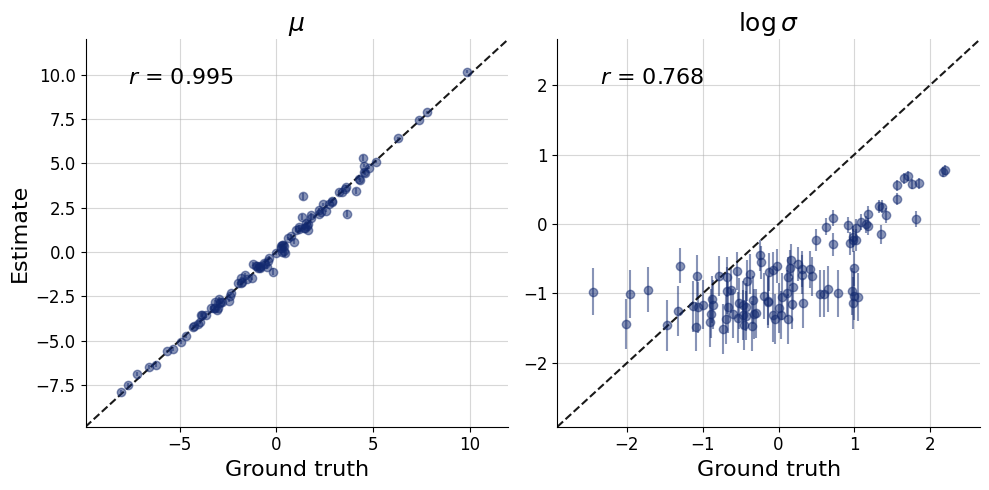

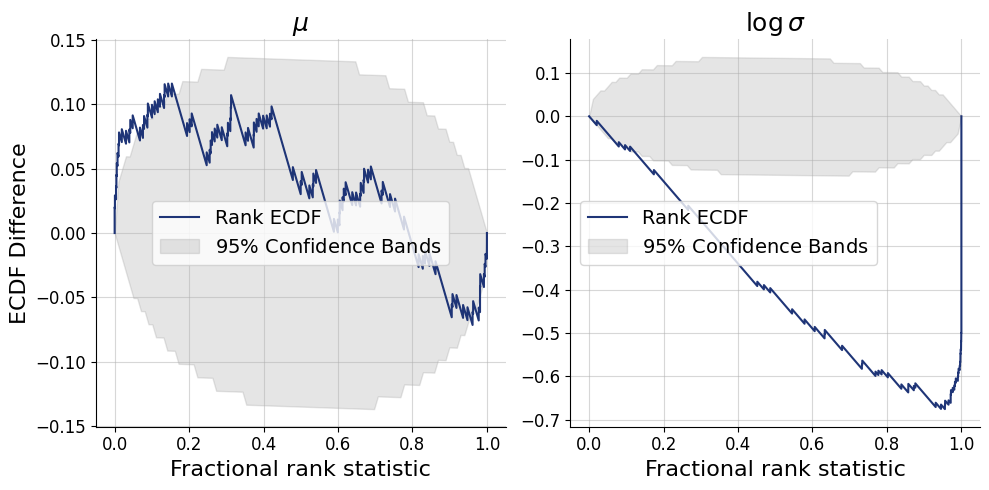

In [6]:
diagnostics.recovery(global_posterior, true_global, variable_names=global_param_names)
diagnostics.calibration_ecdf(global_posterior, true_global, difference=True, variable_names=global_param_names);

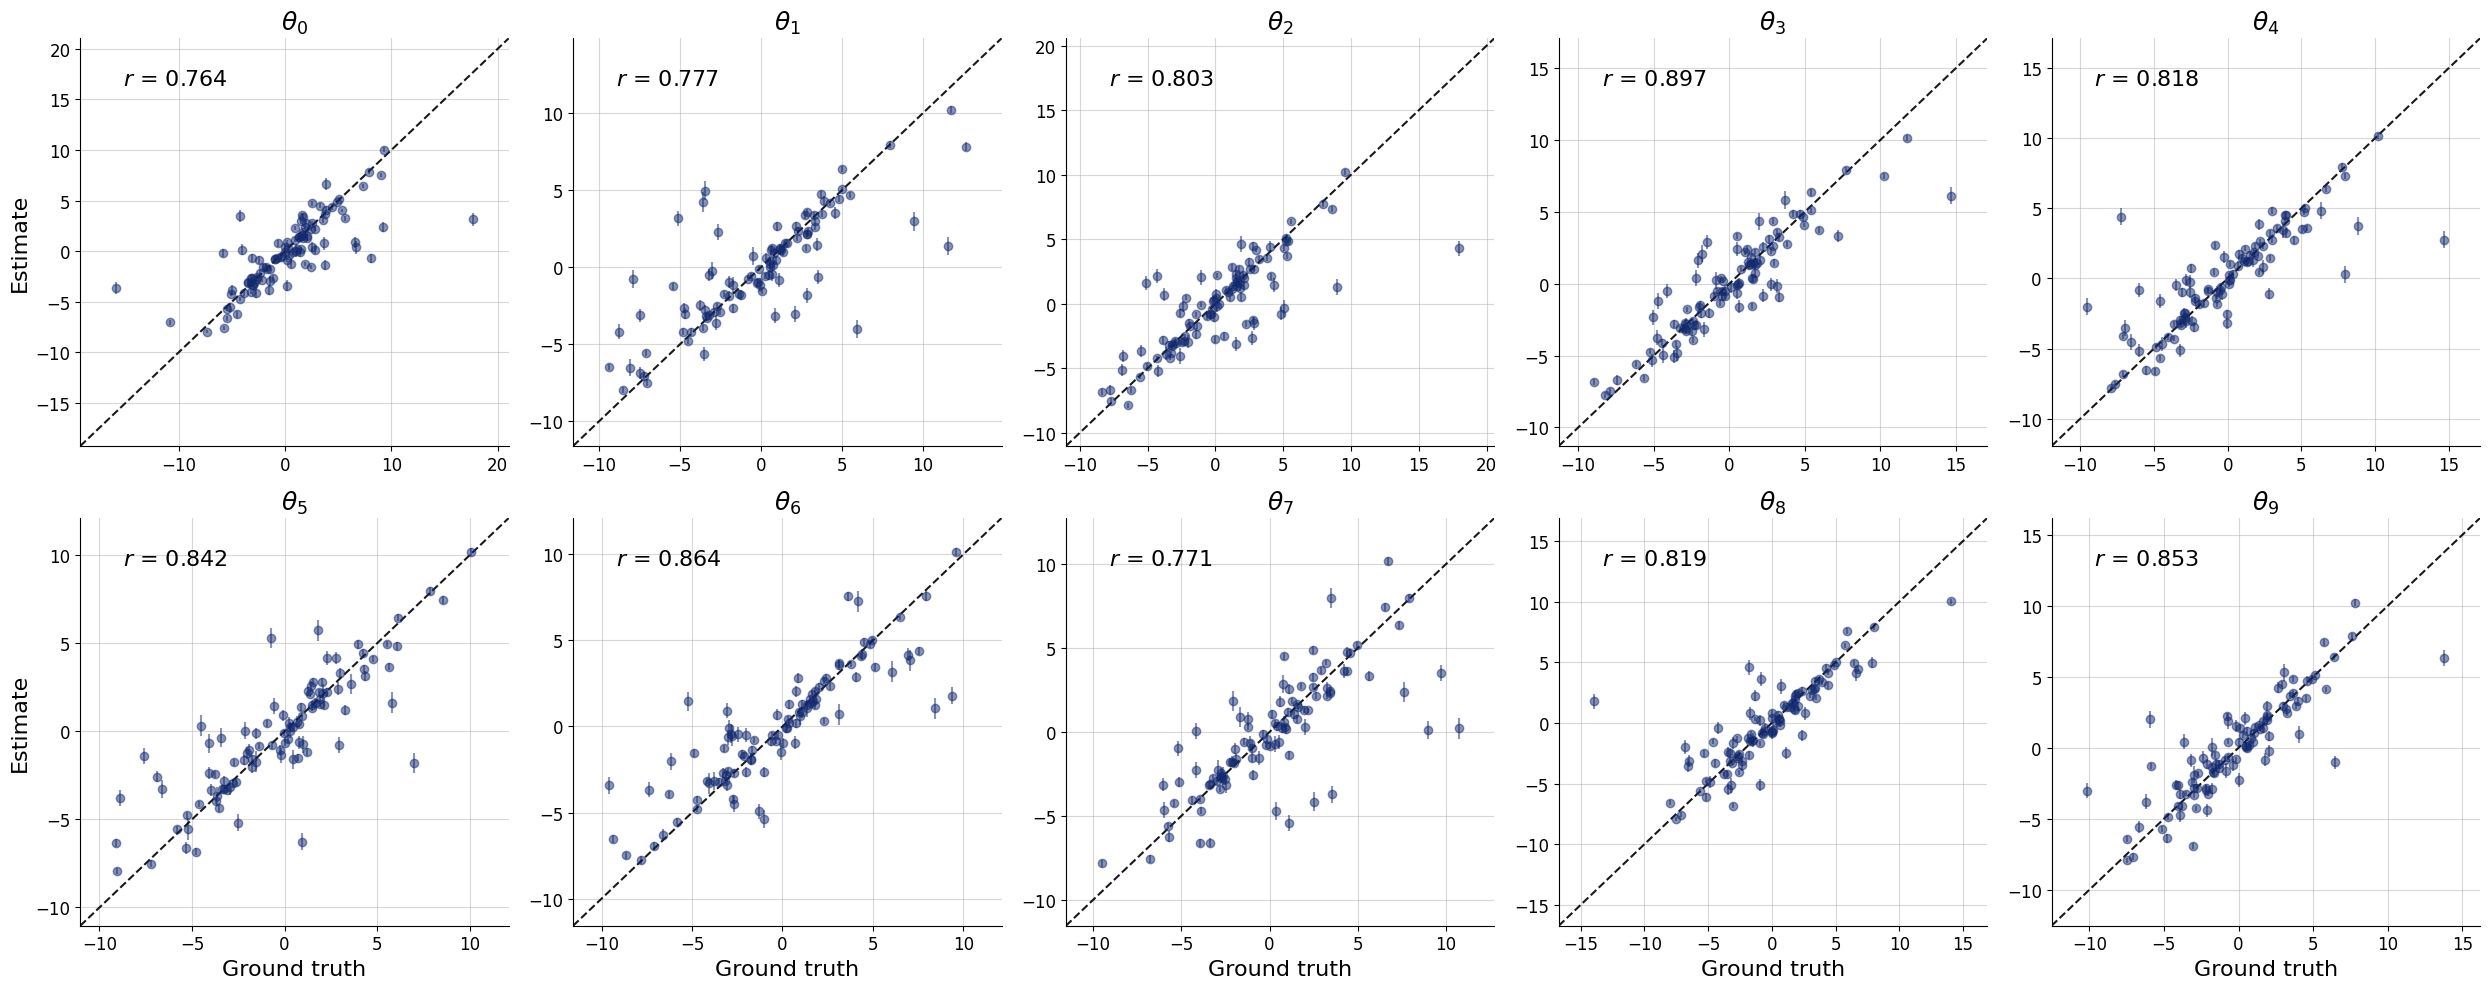

In [7]:
diagnostics.recovery(local_posterior[:, :, :10], true_local[:, :10], variable_names=local_param_names[:10]);

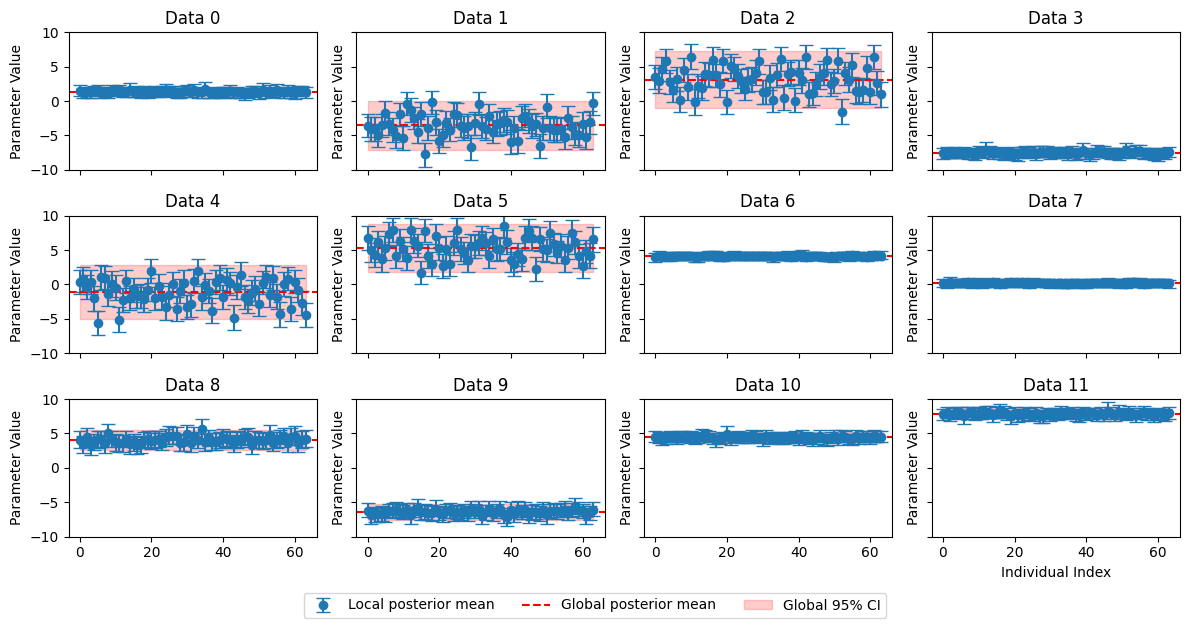

In [8]:
plot_shrinkage(global_posterior[:12], local_posterior[:12, :, :, np.newaxis], min_max=(-10, 10))